# Chapter 1. Tables, Observations, and Variables

# 1.1 Introduction to Tabular Data

What does data look like? For most people, the first image that comes to mind is a spreadsheet, with numbers neatly arranged in a table of rows and columns. One goal of this book is to get you to think beyond tables of numbers---to recognize that the words in a book and the markers on a map are also data to be collected, processed, and analyzed. But a lot of data in the world is still organized into tables, so it is still important to know how to work with **tabular data**.

Let's look at a tabular data set. Shown below are the first 5 rows of a data set about the passengers on the Titanic. This data set contains information about each passenger (e.g., name, sex, age), their journey (e.g., the fare they paid, their destination), and their ultimate fate (e.g., whether they survived or not, the lifeboat they were on).

<img src="titanic_data.png" width="800">

In a tabular data set, each row represents a distinct observation and each column a distinct variable. Each **observation** corresponds to a single entity being measured, and **variables** are the attributes we measure. In the Titanic data set above, each row represents a passenger. For each passenger, 14 variables have been recorded, including `pclass` (their ticket class: 1, 2, or 3) and `boat` (which lifeboat they were on, if they survived).

## Storing Data on Disk and in Memory

How do we represent tabular data on disk so that it can be saved for later or shared with someone else? The Titanic data set above is saved in a file called `titanic.csv`. Let's peek inside this file using the shell command `head`.

_Jupyter Tip_: To run a shell command inside a Jupyter notebook, simply prefix the shell command by the `!` character.

_Jupyter Tip_: To run a cell, click on it and press the "play" button in the toolbar above. (Alternatively, you can press Shift+Enter.)

In [3]:
 !head ../data/titanic.csv


'Chapter 1.1.ipynb'   titanic.csv   titanic_data.png


The first line of this file contains the names of the variables, separated by commas. Each subsequent line contains the values of those variables for a passenger.  The values appear in the same order as the variable names in the first line and are also separated by commas. Because the values in this file are separated (or _delimited_) by commas, this file is called a **comma-separated values** file, or **CSV** for short. CSV files typically have a `.csv` file extension, but not always.

Although commas are by far the most common delimiter, you will sometimes encounter tabular data files that use tabs, semicolons (;), or pipes (|) as delimiters.

How do we represent this information in memory so that it can be manipulated efficiently? In Python, the `pandas` library provides a convenient data structure for storing tabular data called the `DataFrame`.

**Alex's Note** Here are the links to the Pandas documentation pages for the methods that we are using in this notebook.

Main Pandas Documentation Page: https://pandas.pydata.org/docs/index.html

Pandas DataFrame class: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

read_csv() method for reading a CSV document into a Pandas Data frame: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv


In [4]:
## We are starting our study of Pandas, the Python package for management of tabular data
import pandas as pd   ## this is a typical abbreviation used for Pandas functionality. We will use "pd" as the prefix for Pandas throughout the course.
pd.DataFrame

pandas.core.frame.DataFrame

To read a file directly from disk into a `pandas` `DataFrame`, we can use the `read_csv` function in `pandas`. The first line of code below reads the Titanic dataset into a `DataFrame` called `df`. The second line calls the `.head()` method of `DataFrame`, which returns a new `DataFrame` consisting of just the first few rows (or "head") of the original.

In [15]:
dd = pd.DataFrame([[40,'alex'],
                    [59,'bob'],
                    [79,'maya'],
                    [33, 'kim']], columns = ['id', 'name'],  index = ['a','b','c','d'])

dd


id  name
a  40  alex
b  59   bob
c  79  maya
d  33   kim

In [30]:
filename = "titanic.csv"
df = pd.read_csv(filename)
df.head()

pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

_Jupyter Tip_: When you execute a cell in a Jupyter notebook, the result of the last line is automatically printed. To suppress this output, you can do one of two things:

- Assign the result to a variable, i.e., `df_head = df.head()`.
- Add a semicolon to the end of the line, i.e., `df.head();`.

I encourage you to try these out by modifying the code above and re-running the cell!

Now that the tabular data is in memory as a `DataFrame`, we can manipulate it by writing Python code.

**Alex's Note**

read_csv() by defeault assumes that the first row of the CSV file is the header, i.e., contains the names of the columns. Because of this, our read_csv() call automatically recognized the names of the columns for the Titanic dataset.

**Alex's Note**  Here is the list of all columns of the Titanic data frame with a brief explanation of their meaning.

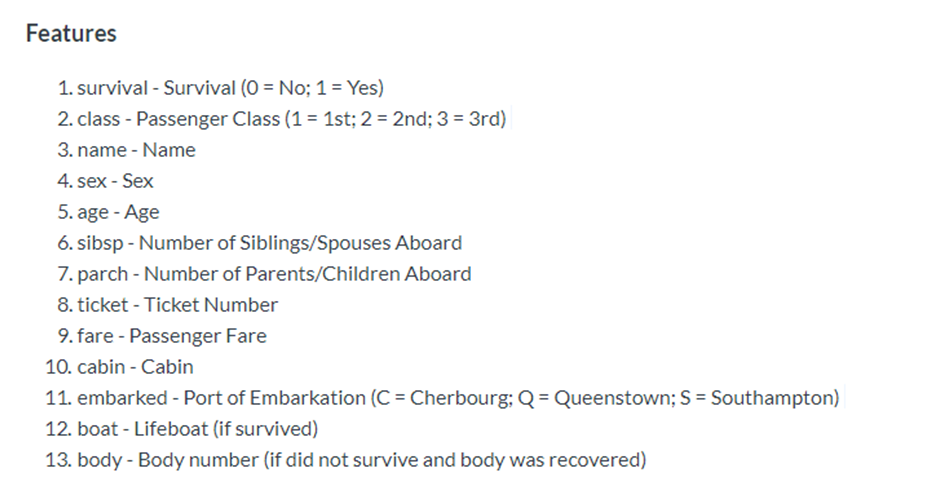

## Observations

Recall that **observations** are the rows in a tabular data set. It is important to think about what each row represents, or the **unit of observation**, before starting your data analysis. In the Titanic `DataFrame`, the unit of observation is a passenger. Although this might seem to be the obvious representation, it has disadvantages. For one, it loses information about the relationships between passengers.

For example, notice the four passengers below with the last name "Allison". By comparing these passengers to each other (i.e., they all paid the same fare and had the same destination), it appears that they are all members of one family, a fact which is confirmed by [Wikipedia](https://en.wikipedia.org/wiki/Allison_family). But there is nothing in the data to indicate this relationship.

In [20]:
df.head()

pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

What if we instead had one row per _family_, instead of one row per _passenger_? Such a representation would preserve familial relationships between passengers. We could still store information about _how many_ members of each family survived, but this representation would make it difficult to store information about _which_ members survived.

There is no single "best" representation of the data. The right representation depends on the question you are trying to answer: if you are studying families on the Titanic, then you might want the unit of observation to be a family, but if you need to know which passengers survived, then you might prefer it to be a passenger. No matter which representation you choose, it is important to be conscious of the unit of observation.

### The Row Index

In a `DataFrame`, each observation is identified by an index. You can determine the index of a `DataFrame` by looking for the **bolded** values at the beginning of each row when you print the `DataFrame`. For example, notice how the numbers **0**, **1**, **2**, **3**, **4**, ... above are bolded, which indicates that this `DataFrame` is indexed by integers starting from 0. This is the default index when you read in a data set from disk into `pandas`, unless you specify otherwise.

Since each row represents one passenger, it might be useful to re-index the rows by the name of the passenger. To do this, we call the `.set_index()` method of `DataFrame`, passing in the name of the column we want to use as the index. Notice how `name` now appears at the very left, and the passengers' names are all bolded. This is how you know that `name` is the index of this `DataFrame`.

In [23]:
df.set_index("name").head()



pclass  survived     sex  \
name                                                                        
Allen, Miss. Elisabeth Walton                       1.0       1.0  female   
Allison, Master. Hudson Trevor                      1.0       1.0    male   
Allison, Miss. Helen Loraine                        1.0       0.0  female   
Allison, Mr. Hudson Joshua Creighton                1.0       0.0    male   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     1.0       0.0  female   

                                                     age  sibsp  parch  \
name                                                                     
Allen, Miss. Elisabeth Walton                    29.0000    0.0    0.0   
Allison, Master. Hudson Trevor                    0.9167    1.0    2.0   
Allison, Miss. Helen Loraine                      2.0000    1.0    2.0   
Allison, Mr. Hudson Joshua Creighton             30.0000    1.0    2.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000    1.0    2.0   

                                                 ticket      fare    cabin  \
name                                                                         
Allen, Miss. Elisabeth Walton                     24160  211.3375       B5   
Allison, Master. Hudson Trevor                   113781  151.5500  C22 C26   
Allison, Miss. Helen Loraine                     113781  151.5500  C22 C26   
Allison, Mr. Hudson Joshua Creighton             113781  151.5500  C22 C26   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  113781  151.5500  C22 C26   

                                                embarked boat   body  \
name                                                                   
Allen, Miss. Elisabeth Walton                          S    2    NaN   
Allison, Master. Hudson Trevor                         S   11    NaN   
Allison, Miss. Helen Loraine                           S  NaN    NaN   
Allison, Mr. Hudson Joshua Creighton                   S  NaN  135.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        S  NaN    NaN   

                                                                       home.dest  
name                                                                              
Allen, Miss. Elisabeth Walton                                       St Louis, MO  
Allison, Master. Hudson Trevor                   Montreal, PQ / Chesterville, ON  
Allison, Miss. Helen Loraine                     Montreal, PQ / Chesterville, ON  
Allison, Mr. Hudson Joshua Creighton             Montreal, PQ / Chesterville, ON  
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Montreal, PQ / Chesterville, ON

_Warning_: The `.set_index()` method does _not_ modify the original `DataFrame`. It returns a _new_ `DataFrame` with the specified index. To verify this, let's look at `df` again after running the above code.

In [31]:
df.head()

dd = df.copy()

dd.set_index("name", inplace = True)



In [35]:
dd.head()

pclass  survived     sex  \
name                                                                        
Allen, Miss. Elisabeth Walton                       1.0       1.0  female   
Allison, Master. Hudson Trevor                      1.0       1.0    male   
Allison, Miss. Helen Loraine                        1.0       0.0  female   
Allison, Mr. Hudson Joshua Creighton                1.0       0.0    male   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     1.0       0.0  female   

                                                     age  sibsp  parch  \
name                                                                     
Allen, Miss. Elisabeth Walton                    29.0000    0.0    0.0   
Allison, Master. Hudson Trevor                    0.9167    1.0    2.0   
Allison, Miss. Helen Loraine                      2.0000    1.0    2.0   
Allison, Mr. Hudson Joshua Creighton             30.0000    1.0    2.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000    1.0    2.0   

                                                 ticket      fare    cabin  \
name                                                                         
Allen, Miss. Elisabeth Walton                     24160  211.3375       B5   
Allison, Master. Hudson Trevor                   113781  151.5500  C22 C26   
Allison, Miss. Helen Loraine                     113781  151.5500  C22 C26   
Allison, Mr. Hudson Joshua Creighton             113781  151.5500  C22 C26   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  113781  151.5500  C22 C26   

                                                embarked boat   body  \
name                                                                   
Allen, Miss. Elisabeth Walton                          S    2    NaN   
Allison, Master. Hudson Trevor                         S   11    NaN   
Allison, Miss. Helen Loraine                           S  NaN    NaN   
Allison, Mr. Hudson Joshua Creighton                   S  NaN  135.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        S  NaN    NaN   

                                                                       home.dest  
name                                                                              
Allen, Miss. Elisabeth Walton                                       St Louis, MO  
Allison, Master. Hudson Trevor                   Montreal, PQ / Chesterville, ON  
Allison, Miss. Helen Loraine                     Montreal, PQ / Chesterville, ON  
Allison, Mr. Hudson Joshua Creighton             Montreal, PQ / Chesterville, ON  
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Montreal, PQ / Chesterville, ON

Nothing has changed! If you want to save the `DataFrame` with the new index, you have to explicitly assign it to a variable.

In [25]:
df_by_name = df.set_index("name")
df_by_name.head()

pclass  survived     sex  \
name                                                                        
Allen, Miss. Elisabeth Walton                       1.0       1.0  female   
Allison, Master. Hudson Trevor                      1.0       1.0    male   
Allison, Miss. Helen Loraine                        1.0       0.0  female   
Allison, Mr. Hudson Joshua Creighton                1.0       0.0    male   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     1.0       0.0  female   

                                                     age  sibsp  parch  \
name                                                                     
Allen, Miss. Elisabeth Walton                    29.0000    0.0    0.0   
Allison, Master. Hudson Trevor                    0.9167    1.0    2.0   
Allison, Miss. Helen Loraine                      2.0000    1.0    2.0   
Allison, Mr. Hudson Joshua Creighton             30.0000    1.0    2.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000    1.0    2.0   

                                                 ticket      fare    cabin  \
name                                                                         
Allen, Miss. Elisabeth Walton                     24160  211.3375       B5   
Allison, Master. Hudson Trevor                   113781  151.5500  C22 C26   
Allison, Miss. Helen Loraine                     113781  151.5500  C22 C26   
Allison, Mr. Hudson Joshua Creighton             113781  151.5500  C22 C26   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  113781  151.5500  C22 C26   

                                                embarked boat   body  \
name                                                                   
Allen, Miss. Elisabeth Walton                          S    2    NaN   
Allison, Master. Hudson Trevor                         S   11    NaN   
Allison, Miss. Helen Loraine                           S  NaN    NaN   
Allison, Mr. Hudson Joshua Creighton                   S  NaN  135.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        S  NaN    NaN   

                                                                       home.dest  
name                                                                              
Allen, Miss. Elisabeth Walton                                       St Louis, MO  
Allison, Master. Hudson Trevor                   Montreal, PQ / Chesterville, ON  
Allison, Miss. Helen Loraine                     Montreal, PQ / Chesterville, ON  
Allison, Mr. Hudson Joshua Creighton             Montreal, PQ / Chesterville, ON  
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Montreal, PQ / Chesterville, ON

If you do not want to create a new `DataFrame`, you can either assign the result back to itself:

`df = df.set_index("name")`

or use the `inplace=True` argument, which will modify the `DataFrame` in place:

`df.set_index("name", inplace=True)`.

These two commands should only be run once. If you try to run them a second time, you will get an error. Don't take my word for it---create a cell and try it! The reason for the error is: after the command is executed the first time, `name` is no longer a column in `df`, since it is now in the index. When the command is run again, `pandas` will try (and fail) to find a column called `name`. 

Thus, the interactivity of Jupyter notebooks is both a blessing and a curse. It allows us to see the results of our code immediately, but it makes it too easy to lose track of the state, especially if you run code twice or out of order. Remember that Jupyter notebooks were designed to be run from beginning to end. Keep this in mind as you run other people's notebooks and as you design your own notebooks.

### Selecting Rows

Now that we have set the (row) index of the `DataFrame` to be the passengers' names, we can use the index to select specific passengers. To do this, we use the `.loc` selector. The `.loc` selector takes in a label and returns the row(s) corresponding to that index label.

For example, if we wanted to find the data for the father of the Allison family, we would pass in the label "Allison, Master. Hudson Trevor" to `.loc`. Notice the square brackets. 

In [42]:
type(df_by_name['cabin'])

pandas.core.series.Series

In [37]:
df_by_name.loc["Allison, Master. Hudson Trevor"]
df_by_name.loc["Allison, Miss. Helen Loraine"]

pclass                                   1.0
survived                                 0.0
sex                                   female
age                                      2.0
sibsp                                    1.0
parch                                    2.0
ticket                                113781
fare                                  151.55
cabin                                C22 C26
embarked                                   S
boat                                     NaN
body                                     NaN
home.dest    Montreal, PQ / Chesterville, ON
Name: Allison, Miss. Helen Loraine, dtype: object

Notice that the data for a single row is printed differently. This is no accident. If we inspect the type of this data structure:

In [41]:
type(df_by_name.loc["Allison, Master. Hudson Trevor"])

pandas.core.series.Series

we see that it is not a `DataFrame`, but a different data structure called a `Series`.

`.loc` also accepts a _list_ of labels, in which case it returns multiple rows, one row for each label in the list. So, for example, if we wanted to select all 4 members of the Allison family from `df_by_name`, we would pass in a list with each of their names.

In [43]:
df_by_name.loc[[
    "Allison, Master. Hudson Trevor",
    "Allison, Miss. Helen Loraine",
    "Allison, Mr. Hudson Joshua Creighton",
    "Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
]]

pclass  survived     sex  \
name                                                                        
Allison, Master. Hudson Trevor                      1.0       1.0    male   
Allison, Miss. Helen Loraine                        1.0       0.0  female   
Allison, Mr. Hudson Joshua Creighton                1.0       0.0    male   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     1.0       0.0  female   

                                                     age  sibsp  parch  \
name                                                                     
Allison, Master. Hudson Trevor                    0.9167    1.0    2.0   
Allison, Miss. Helen Loraine                      2.0000    1.0    2.0   
Allison, Mr. Hudson Joshua Creighton             30.0000    1.0    2.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000    1.0    2.0   

                                                 ticket    fare    cabin  \
name                                                                       
Allison, Master. Hudson Trevor                   113781  151.55  C22 C26   
Allison, Miss. Helen Loraine                     113781  151.55  C22 C26   
Allison, Mr. Hudson Joshua Creighton             113781  151.55  C22 C26   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  113781  151.55  C22 C26   

                                                embarked boat   body  \
name                                                                   
Allison, Master. Hudson Trevor                         S   11    NaN   
Allison, Miss. Helen Loraine                           S  NaN    NaN   
Allison, Mr. Hudson Joshua Creighton                   S  NaN  135.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        S  NaN    NaN   

                                                                       home.dest  
name                                                                              
Allison, Master. Hudson Trevor                   Montreal, PQ / Chesterville, ON  
Allison, Miss. Helen Loraine                     Montreal, PQ / Chesterville, ON  
Allison, Mr. Hudson Joshua Creighton             Montreal, PQ / Chesterville, ON  
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Montreal, PQ / Chesterville, ON

Notice that when there are multiple rows, the resulting data is stored in a `DataFrame`.

The members of the Allison family happen to be consecutive rows of the `DataFrame`. When the rows you want to select are consecutive, you do not need to type out the index of all the rows you want. Instead, you can use **slice notation**. The slice notation `a:b` allows you to select all rows from `a` to `b`. So another way we could have selected all four members of the Allison family is to write:

In [44]:
df_by_name.loc["Allison, Master. Hudson Trevor":"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"]

pclass  survived     sex  \
name                                                                        
Allison, Master. Hudson Trevor                      1.0       1.0    male   
Allison, Miss. Helen Loraine                        1.0       0.0  female   
Allison, Mr. Hudson Joshua Creighton                1.0       0.0    male   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     1.0       0.0  female   

                                                     age  sibsp  parch  \
name                                                                     
Allison, Master. Hudson Trevor                    0.9167    1.0    2.0   
Allison, Miss. Helen Loraine                      2.0000    1.0    2.0   
Allison, Mr. Hudson Joshua Creighton             30.0000    1.0    2.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000    1.0    2.0   

                                                 ticket    fare    cabin  \
name                                                                       
Allison, Master. Hudson Trevor                   113781  151.55  C22 C26   
Allison, Miss. Helen Loraine                     113781  151.55  C22 C26   
Allison, Mr. Hudson Joshua Creighton             113781  151.55  C22 C26   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  113781  151.55  C22 C26   

                                                embarked boat   body  \
name                                                                   
Allison, Master. Hudson Trevor                         S   11    NaN   
Allison, Miss. Helen Loraine                           S  NaN    NaN   
Allison, Mr. Hudson Joshua Creighton                   S  NaN  135.0   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        S  NaN    NaN   

                                                                       home.dest  
name                                                                              
Allison, Master. Hudson Trevor                   Montreal, PQ / Chesterville, ON  
Allison, Miss. Helen Loraine                     Montreal, PQ / Chesterville, ON  
Allison, Mr. Hudson Joshua Creighton             Montreal, PQ / Chesterville, ON  
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Montreal, PQ / Chesterville, ON

This behavior of the slice may be somewhat surprising to you if you are a Python veteran. We will have more to say about this in a second.

What if you wanted to inspect the 100th row of the `DataFrame`, but didn't know the index label for that row? You can use `.iloc` to **select by position** (in contrast to `.loc`, which **selects by label**).

Remember that `pandas` (and Python in general) uses zero-based indexing, so the position index of the 100th row is 99.

In [59]:
df.iloc[-4:-2]

pclass  survived                       name   sex   age  sibsp  parch  \
1306     3.0       0.0  Zakarian, Mr. Mapriededer  male  26.5    0.0    0.0   
1307     3.0       0.0        Zakarian, Mr. Ortin  male  27.0    0.0    0.0   

     ticket   fare cabin embarked boat   body home.dest  
1306   2656  7.225   NaN        C  NaN  304.0       NaN  
1307   2670  7.225   NaN        C  NaN    NaN       NaN

You can also select multiple rows by position, either by passing in a list:

In [19]:
df_by_name.iloc[[99, 100]]

pclass  survived     sex  \
name                                                                           
Duff Gordon, Lady. (Lucille Christiana Sutherla...     1.0       1.0  female   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")           1.0       1.0    male   

                                                     age  sibsp  parch  \
name                                                                     
Duff Gordon, Lady. (Lucille Christiana Sutherla...  48.0    1.0    0.0   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")        49.0    1.0    0.0   

                                                      ticket     fare cabin  \
name                                                                          
Duff Gordon, Lady. (Lucille Christiana Sutherla...     11755  39.6000   A16   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")        PC 17485  56.9292   A20   

                                                   embarked boat  body  \
name                                                                     
Duff Gordon, Lady. (Lucille Christiana Sutherla...        C    1   NaN   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")              C    1   NaN   

                                                         home.dest  
name                                                                
Duff Gordon, Lady. (Lucille Christiana Sutherla...  London / Paris  
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")        London / Paris

or by using slice notation:

In [51]:
df_by_name.iloc[99:101]

pclass  survived     sex  \
name                                                                           
Duff Gordon, Lady. (Lucille Christiana Sutherla...     1.0       1.0  female   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")           1.0       1.0    male   

                                                     age  sibsp  parch  \
name                                                                     
Duff Gordon, Lady. (Lucille Christiana Sutherla...  48.0    1.0    0.0   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")        49.0    1.0    0.0   

                                                      ticket     fare cabin  \
name                                                                          
Duff Gordon, Lady. (Lucille Christiana Sutherla...     11755  39.6000   A16   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")        PC 17485  56.9292   A20   

                                                   embarked boat  body  \
name                                                                     
Duff Gordon, Lady. (Lucille Christiana Sutherla...        C    1   NaN   
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")              C    1   NaN   

                                                         home.dest  
name                                                                
Duff Gordon, Lady. (Lucille Christiana Sutherla...  London / Paris  
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")        London / Paris

Notice the difference between how slice notation works for `.loc` and `.iloc`.

- `.loc[a:b]` returns the rows from `a` up to `b`, _including_ `b`.
- `.iloc[a:b]` returns the rows from `a` up to `b`, _not including_ `b`.

So to select the rows in positions 99 and 100, we do `.iloc[99:101]` because we want the rows from position 99 up to 101, _not including 101_. This is consistent with the behavior of slices elsewhere in Python. For example, the slice `1:2` applied to a list returns one element, not two.

In [ ]:
test = ["a", "b", "c", "d"]
test[1:2]

### What Makes a Good Index?

Something odd happens if we look for "Mr. James Kelly" in this `DataFrame`. Although we only ask for one label, we get two rows back.

In [60]:
df_by_name.loc["Kelly, Mr. James"]

pclass  survived   sex   age  sibsp  parch  ticket    fare  \
name                                                                           
Kelly, Mr. James     3.0       0.0  male  34.5    0.0    0.0  330911  7.8292   
Kelly, Mr. James     3.0       0.0  male  44.0    0.0    0.0  363592  8.0500   

                 cabin embarked boat  body home.dest  
name                                                  
Kelly, Mr. James   NaN        Q  NaN  70.0       NaN  
Kelly, Mr. James   NaN        S  NaN   NaN       NaN

This happened because there were two passengers on the Titanic named "James Kelly". In general, a good row index should uniquely identify observations in the data set. Names are often, but not always, unique. The best row indexes are usually IDs that are guaranteed to be unique.

Another common row index is time. If each row represents a measurement in time, then it makes sense to have the date or the timestamp be the index.

## Variables

Recall that **variables** are the columns in a tabular data set. They are the measurements that we make on each observation.

### Selecting Variables

Suppose we want to select the `age` column from the `DataFrame` above. There are three ways to do this.

1\.  Use `.loc`, specifying both the rows and columns. (_Note:_ The colon `:` is Python shorthand for "all".)

In [65]:
df.loc[:, ["age", "sex"]]

age     sex
0     29.0000  female
1      0.9167    male
2      2.0000  female
3     30.0000    male
4     25.0000  female
...       ...     ...
1305      NaN  female
1306  26.5000    male
1307  27.0000    male
1308  29.0000    male
1309      NaN     NaN

[1310 rows x 2 columns]

In [66]:
df[["age", "sex"]]

age     sex
0     29.0000  female
1      0.9167    male
2      2.0000  female
3     30.0000    male
4     25.0000  female
...       ...     ...
1305      NaN  female
1306  26.5000    male
1307  27.0000    male
1308  29.0000    male
1309      NaN     NaN

[1310 rows x 2 columns]

2\. Access the column as you would a key in a `dict`.

In [67]:
df["age"]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
1309        NaN
Name: age, Length: 1310, dtype: float64

3\. Access the column as an attribute of the `DataFrame`.

In [68]:
df.age

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
1309        NaN
Name: age, Length: 1310, dtype: float64

Method 3 (attribute access) is the most concise. However, it does not work if the variable name contains spaces or special characters, begins with a number, or matches an existing attribute of `DataFrame`. For example, if `df` had a column called `head`, `df.head` would not return the column because `df.head` already means something else, as we have seen.

Notice that the data structure used to store a single column is again a `Series`, not a `DataFrame`. So single rows and columns are stored in `Series`.

To select multiple columns, you would pass in a _list_ of variable names, instead of a single variable name. For example, to select both the `age` and `sex` variables, we could do one of the following:

In [69]:
# METHOD 1
df.loc[:, ["age", "sex"]].head()

# METHOD 2
df[["age", "sex"]].head()

age     sex
0  29.0000  female
1   0.9167    male
2   2.0000  female
3  30.0000    male
4  25.0000  female

Note that there is no way to generalize attribute access (Method 3 above) to select multiple columns.

### The Different Types of Variables

There is a fundamental difference between variables like `age` and `fare`, which can be measured on a numeric scale, and variables like `sex` and `home.dest`, which cannot. 

Variables that can be measured on a numeric scale are called **quantitative variables**. Just because a variable happens to contain numbers does not necessarily make it "quantitative". For example, consider the variable `survived` in the Titanic data set. Each passenger either survived or didn't. This data set happens to use 1 for "survived" and 0 for "died", but these numbers do not reflect an underlying numeric scale.

Variables that are not quantitative but take on a limited set of values are called **categorical variables**. For example, the variable `sex` takes on one of two possible values ("female" or "male"), so it is a categorical variable. So is the variable `home.dest`, which takes on a larger, but still limited, set of values. We call each possible value of a categorical variable a "category". Although categories are usually non-numeric (as in the case of `sex` and `home.dest`), they are sometimes numeric. For example, the variable `survived` in the Titanic data set is a categorical variable with two categories (1 if the passenger survived, 0 if they didn't), even though those values are numbers. With a categorical variable, we are usually interested in the frequencies of each category.

Some variables do not fit neatly into either category. For example, the variable `name` in the Titanic data set is obviously not quantitative, but it is not categorical either because it does not take on a limited set of values. Generally speaking, every passenger will have a different name (the two James Kellys notwithstanding), so it does not make sense to analyze the frequencies of different names, as one might do with a categorical variable. We will group variables like `name`, that are neither quantitative nor categorical, into an "other" category.

Every variable can be classified into one of these three **types**: quantitative, categorical, or other. The type of the variable often dictates the kind of analysis we do and the kind of visualizations we make, as we will see soon. 

`pandas` tries to infer the type of each variable automatically. If every value in a column (except for the missing ones) can be cast to a number, then `pandas` will treat that variable as quantitative. Otherwise, the variable is treated as categorical. To see the type that Pandas inferred for a variable, simply select that variable using the methods above and look for its `dtype`. A `dtype` of `float64` or `int64` indicates that the variable is quantitative.  For example, the `age` variable above had a `dtype` of `float64`, so it is quantitative. On the other hand, if we look at the `sex` variable,

In [26]:
df.sex

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

its `dtype` is `object`, so `pandas` will treat it as a categorical variable. Sometimes, this check can yield surprises. For example, if you only looked the first few rows of `df`, you might expect `ticket` to be a quantitative variable. But if we actually look at its `dtype`:

In [27]:
df.ticket

0        24160
1       113781
2       113781
3       113781
4       113781
         ...  
1305      2665
1306      2656
1307      2670
1308    315082
1309       NaN
Name: ticket, Length: 1310, dtype: object

it appears to be an `object`. That is because there are some values in this column that contain non-numeric characters. For example:

In [28]:
df.ticket[9]

'PC 17609'

As long as there is one value in the column that cannot be cast to a numeric value, the entire column will be treated as categorical, and the individual values will be strings (notice the quotes around even a number like 24160). 

In [29]:
df.ticket[0]

'24160'

If you wanted `pandas` to treat this variable as quantitative, you can use the `to_numeric()` function. However, you have to specify what to do for values like `'PC 17609'` that cannot be converted to a number. The `errors="coerce"` option tells `pandas` to treat these values as missing (`NaN`).

In [30]:
pd.to_numeric(df.ticket, errors="coerce")

0        24160.0
1       113781.0
2       113781.0
3       113781.0
4       113781.0
          ...   
1305      2665.0
1306      2656.0
1307      2670.0
1308    315082.0
1309         NaN
Name: ticket, Length: 1310, dtype: float64

If we wanted to keep this change, we would assign this column back to the original `DataFrame`, as follows:

`df.ticket = pd.to_numeric(df.ticket, errors="coerce")`.

But since `ticket` does not appear to be a quantitative variable, we do not actually want to save this change.

There are also variables that are categorical that `pandas` infers as quantitative because the values happen to be numbers. As we discussed earlier, the `survived` variable is categorical, but the values happen to be coded as 1 or 0. To force `pandas` to treat this as a categorical variable, you can cast the values to strings. Notice how the `dtype` changes:

In [70]:
df.survived

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1305    0.0
1306    0.0
1307    0.0
1308    0.0
1309    NaN
Name: survived, Length: 1310, dtype: float64

In [31]:
df.survived.astype(str)

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1305    0.0
1306    0.0
1307    0.0
1308    0.0
1309    nan
Name: survived, Length: 1310, dtype: object

In this case, this is a change that we actually want to keep, so we assign the modified column back to the `DataFrame`.

In [33]:
df.survived = df.survived.astype(str)

**Alex's Note**

One important piece of information about a data frame that is always useful to know is the dimensions of the data frame: i.e., the number of rows and the number of columns (well, technically, these are two pieces of information).

This can be done in a number of ways.

1. `df.shape`: the `shape` attribute of the DataFrame class is a Python tuple containing two values: the number of rows (the first element of the tuple) and the number of columns (the second element of the tuple).  Thus, to find out how many rows a data frame has, one can write

    `df.shape[0]`,
while to find out how many columns a data frame has, one can write

     `df.shape[1]`
     
2. Use of the `len()` function.  Curiously, while a data frame is a complex object, from the point of view of the `len()` function is can be cast as a list where each element is a single row of the data frame. Therefore, `len(df)` produces the number of rows in the data frame `df`.

  To find out the number of columns in a data frame using the `len()` function, we can use the following two-step process.  First, `columns`, is an attribute of a data frame that returns the list of column names. This list is returned in a form of an instance of a Pandas `index` datatype (`pandas.core.indexes.base.Index`), but it is convertable into a regular Pandas `list`, and therefore, `len(df.columns)` returns the length of the list of column names, i.e., the number of columns in the data frame.


In [71]:
df.shape

(1310, 14)

In [72]:
len(df), df.columns, len(df.columns)

(1310,
 Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
       dtype='object'),
 14)

## Summary

- Tabular data is stored in a data structure called a `DataFrame`.
- Rows represent observations; columns represent variables.
- Single rows and columns are stored in a data structure called a `Series`.
- The row index should be a set of labels that uniquely identify observations.
- To select rows by label, we use `.loc[]`. To select rows by (0-based) position, we use `.iloc[]`.
- To select columns, we can use `.loc` notation (specifying both the rows and columns we want, separated by a comma), key access, or attribute access.
- Variables can be quantitative, categorical, or other.
- Pandas will try to infer the type, and you can check the type that Pandas inferred by looking at the `dtype`.

# Exercises

**Exercise 1.** Consider the variable `pclass` in the Titanic data set, which is 1, 2, or 3, depending on whether the passenger was in 1st, 2nd, or 3rd class. 

- What type of variable is this: quantitative, categorical, or other? (_Hint:_ One useful test is to ask yourself, "Does it make sense to add up values of this variable?" If the variable can be measured on a numeric scale, then it should make sense to add up values of that variable.)
- Did `pandas` correctly infer the type of this variable? If not, convert this variable to the appropriate type.

In [ ]:
# YOUR CODE HERE

**Exercise 1-1** One of the most important steps of the data science process is the first step: forumulation of a question/computational challenge that can be answered/addressed by performing some type of analysis of the data.  For the Titanic dataset, think of three different questions that you would want to ask, and type them into the cells below.


**Question 1**

**Question 2**

**Question 3**

Exercises 2-7 deal with the Tips data set (`../data/tips.csv`). You can learn more about this data set on the first page of [this reference](http://www.ggobi.org/book/chap-data.pdf).

**Exercise 2.** Read in the Tips data set into a `pandas` `DataFrame` called `tips`.

- What is the unit of observation in this data set?
- For each variable in the data set, identify it as quantitative, categorical, or other, based on your understanding of each variable. Did `pandas` correctly infer the type of each variable?

In [ ]:
# YOUR CODE HERE

**Exercise 3.** Make the day of the week the index of the `DataFrame`.

- What do you think will happen when you call `tips.loc["Thur"]`? Try it. What happens?
- Is this a good variable to use as the index? Explain why or why not.

In [ ]:
# YOUR CODE HERE

**Exercise 4.** Make sure the index of the `DataFrame` is the default (i.e., 0, 1, 2, ...). If you changed it away from the default in the previous exercise, you can use `.reset_index()` to reset it.

- How do you think `tips.loc[50]` and `tips.iloc[50]` will compare? Now try it. Was your prediction correct?
- How do you think `tips.loc[50:55]` and `tips.iloc[50:55]` will compare? Now try it. Was your prediction correct?

In [ ]:
# YOUR CODE HERE

**Exercise 5.** How do you think `tips.loc[50]` and `tips.loc[[50]]` will compare? Now try it. Was your prediction correct?

In [ ]:
# YOUR CODE HERE

**Exercise 6.** What data structure is used to represent a single column, such as `tips["total_bill"]`? How could you modify this code to obtain a `DataFrame` consisting of just one column, `total_bill`?

In [ ]:
# YOUR CODE HERE

**Exercise 7.** Create a new `DataFrame` from the Tips data that consists of just information about the table (i.e., whether or not there was a smoker, the day and time they visited the restaurant, and the size of the party), without information about the check or who paid.

(There are many ways to do this. How many ways can you find?)

In [ ]:
# YOUR CODE HERE

**Submission Instructions**

Once you complete this assignment, submit this notebook using the `handin` command as follows:

     `$handin dekhtyar 301-lab02 <Filename>`